In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate


KeyboardInterrupt: ignored

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import pandas as pd
data = pd.read_csv("drive/colab/data.csv")

In [0]:
data.head()

,Unnamed: 0,CRET,mcap,EP,BP,CP,SP,ES,RET,REP,RBP,RCP,RSP,CTEF,PM1,BR2,VOL,TOT,MRV1
0,0,0.011,5.43,-0.1806,0.0499,-0.0708,0.0051,0.608,0.022975,-1.9380,-0.0626,-0.2307,-0.4962,-0.3857,1.7010,0.0831,4,8001,0.0984
1,1,0.079,4.35,-0.0577,-0.0424,-0.0240,-0.0488,0.385,-0.004597,-0.0982,0.0016,-0.0670,-0.1363,-0.3857,0.8866,0.0831,2,8001,0.0984
2,2,-0.093,9.24,-0.0043,-0.0445,-0.0246,-0.0441,0.134,0.021353,-0.1462,-0.1461,-0.2011,-0.4251,-0.3857,-0.4077,0.0831,2,8001,0.0984
3,3,-0.087,9.88,0.0336,0.0189,0.0237,-0.0038,0.248,-0.004597,0.1583,0.3306,0.1436,1.6027,-0.3857,-0.8445,0.0831,2,8001,0.0984
4,4,-0.018,4.04,0.0711,-0.0013,0.0107,0.0733,-0.177,-0.002238,0.1180,0.3752,0.1169,0.9677,-0.3857,-1.0680,0.0831,9,8001,0.0984


In [0]:
data_train =data.drop(["Unnamed: 0", "VOL", "TOT", "MRV1"], axis=1)

In [0]:
data_train.head()

,CRET,mcap,EP,BP,CP,SP,ES,RET,REP,RBP,RCP,RSP,CTEF,PM1,BR2
0,0.011,5.43,-0.1806,0.0499,-0.0708,0.0051,0.608,0.022975,-1.9380,-0.0626,-0.2307,-0.4962,-0.3857,1.7010,0.0831
1,0.079,4.35,-0.0577,-0.0424,-0.0240,-0.0488,0.385,-0.004597,-0.0982,0.0016,-0.0670,-0.1363,-0.3857,0.8866,0.0831
2,-0.093,9.24,-0.0043,-0.0445,-0.0246,-0.0441,0.134,0.021353,-0.1462,-0.1461,-0.2011,-0.4251,-0.3857,-0.4077,0.0831
3,-0.087,9.88,0.0336,0.0189,0.0237,-0.0038,0.248,-0.004597,0.1583,0.3306,0.1436,1.6027,-0.3857,-0.8445,0.0831
4,-0.018,4.04,0.0711,-0.0013,0.0107,0.0733,-0.177,-0.002238,0.1180,0.3752,0.1169,0.9677,-0.3857,-1.0680,0.0831


In [0]:
data_train.shape

(95918, 15)

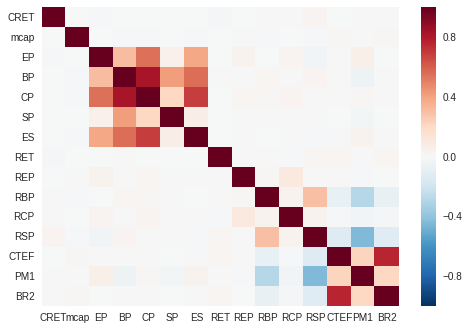

In [0]:
import seaborn as sns
cormat = data_train.corr()
sns.heatmap(cormat)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(data_train, test_size=0.2)

In [0]:
test.shape

(19184, 18)

In [0]:
test.head()

,CRET,mcap,EP,BP,CP,SP,ES,RET,REP,RBP,RCP,RSP,CTEF,PM1,BR2,VOL,TOT,MRV1
77342,0.173,4.10,0.0380,-0.0541,-0.0084,-0.0715,0.002,0.011638,0.0037,-0.0738,0.3633,-0.2402,1.4927,0.5422,0.1620,150,2,1.9552
38436,0.103,9.00,0.0287,-0.0640,-0.0329,-0.0478,-0.077,0.000433,0.0813,-0.0314,0.0619,-0.0739,0.0266,0.0293,-0.0531,51,7,-0.0484
57377,-0.230,0.13,-0.0186,-0.0312,-0.0268,-0.0687,-0.045,-0.002749,-0.0401,0.5430,-0.1172,-0.1400,-0.5828,1.7132,-0.0054,657,6,0.0159
54885,-0.191,5.26,-0.1505,-0.0058,-0.0725,-0.0283,1.116,0.012568,-0.0776,0.8469,-0.0647,1.3724,0.2295,0.6914,-0.0632,45,3,-1.6020
54282,0.143,2.45,-0.0099,-0.0575,-0.0365,-0.0512,0.000,-0.011490,0.2261,-0.3633,0.0656,-0.5605,0.2669,1.5086,0.0879,818,3,-0.1051


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

def neuralnetwork():
    model = Sequential()
#     model.add(Dense(32, input_dim=14, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(16, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(8, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal', activation='linear'))
#     model = Sequential()
    model.add(Dense(32, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
#     model_mc = Sequential()

# #add model layers
#     model_mc.add(Dense(200, activation='relu', input_dim=14))
#     model_mc.add(Dense(200, activation='relu'))
#     model_mc.add(Dense(200, activation='relu'))
#     model_mc.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(lr=0.00001), metrics=['mse','mae'])

    # Compile model
    return model

In [0]:

import numpy as np

In [0]:
dataset=np.loadtxt("drive/colab/data.csv", delimiter=",", skiprows=1)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [0]:

model = neuralnetwork()
x=dataset[:,2:dataset.shape[1]-3]
y=dataset[:,1]
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(x, y)
print(scaler.fit(x))
print(scaler.fit(y))
xscale=scaler.transform(X_train)
yscale=scaler.transform(y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100,  verbose=1, validation_split=0.2)

Train on 57550 samples, validate on 14388 samples
Epoch 1/10
57550/57550 [==============================] - 4s 74us/step - loss: 0.0373 - mean_squared_error: 0.0373 - mean_absolute_error: 0.1212 - val_loss: 0.0336 - val_mean_squared_error: 0.0336 - val_mean_absolute_error: 0.1168
Epoch 2/10
21100/57550 [=========>....................] - ETA: 2s - loss: 0.0372 - mean_squared_error: 0.0372 - mean_absolute_error: 0.1202

In [0]:
import matplotlib.pyplot as plt


dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


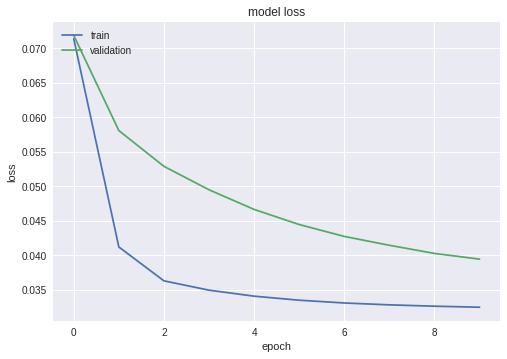

In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
y_pred= model.predict(X_test)
for i in range(100):
  print(y_test[i], y_pred[i])


[-0.077] [0.01710157]
[-0.027] [0.0169938]
[0.062] [0.03561109]
[0.] [0.0117168]
[0.013] [0.0016103]
[0.167] [0.00761833]
[-0.089] [0.01342383]
[-0.045] [0.00773724]
[-0.071] [-0.00147348]
[0.26] [0.01334237]
[-0.028] [0.01903375]
[0.015] [0.07001611]
[0.119] [0.01120279]
[0.] [0.03877894]
[0.058] [0.00935899]
[0.055] [-0.00670133]
[-0.014] [0.01586755]
[0.169] [0.02461322]
[-0.05] [0.00673024]
[-0.11] [0.01967352]
[0.176] [0.03541194]
[0.029] [0.01817445]
[0.155] [0.02116902]
[-0.025] [0.03262581]
[0.141] [0.0490607]
[0.104] [0.00805785]
[-0.05] [0.06112406]
[-0.192] [0.02886252]
[0.167] [0.03086103]
[0.011] [-0.00280147]
[-0.136] [0.00814959]
[0.13] [0.03332881]
[-0.131] [0.02766147]
[0.022] [0.01324556]
[-0.137] [-0.00454156]
[0.327] [0.00382843]
[0.191] [0.00463362]
[0.028] [0.02454488]
[0.127] [0.01266862]
[0.31] [0.04308737]
[0.025] [0.02094213]
[0.119] [0.04646975]
[0.021] [0.01197474]
[0.024] [0.01111109]
[-0.125] [0.03525243]
[0.005] [0.00699853]
[-0.125] [0.01814158]
[0.095] 

In [0]:
(((=y_test - y_pred))**2).mean()

0.05417598516627313

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = regr.predict(X_test)

In [0]:
import matplotlib.pyplot as plt

X_plot = np.arange(len(y_test))

In [0]:
from sklearn.svm import SVR
clf = SVR(gamma='rbf', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train) 

NameError: ignored

In [0]:
clf.predict(X_test)